# CASA 6.2 Notebook Demo

Original Author: rraba@nrao.edu

**Important Note:** (03/05/2021) this notebook has been updated from the original 6.1 version to accomodate recent migration of Google Colab from Python 3.6 to 3.7. If running on your own system, the original version with CASA 6.1 and without the workaround is still a viable option.

## Description

This notebook shows how to install the modular CASA 6 tools and tasks with some basic orientation:

- locate the casadata folder 
- list the available tasks
- find and print the log file
- run a simple tclean command
- view the output images with Astropy
- view the output images with CARTA


## Installation

Note the temporary workaround below, you **must run this notebook twice**, the first time will update the numpy library and then terminate itself.

In [ ]:
# TEMPORARY WORKAROUND for Python 3.7 - you must run this notebook twice!!
import os
import numpy as np

if np.__version__ != '1.20.1':
    print('updating numpy and killing runtime....\nPlease re-run this notebook (Runtime -> Run all)')
    os.system('pip install --upgrade numpy==1.20.1')
    os._exit(00)

In [ ]:
import os

print("installing pre-requisite packages...")
os.system("apt-get install libgfortran3")

print("installing casatools...")
#os.system("pip install --index-url https://casa-pip.nrao.edu/repository/pypi-casa-release/simple casatools==6.1.0.118")
#os.system("pip install --index-url https://casa-pip.nrao.edu/repository/pypi-casa-release/simple casatasks==6.1.0.118")
os.system("pip install --index-url https://casa-pip.nrao.edu:443/repository/pypi-group/simple casatasks==6.2.0.96")
os.system("pip install --index-url https://casa-pip.nrao.edu:443/repository/pypi-group/simple casadata")

print("downloading MeasurementSet from CASAguide First Look at Imaging...\n")
os.system("wget https://bulk.cv.nrao.edu/almadata/public/working/sis14_twhya_calibrated_flagged.ms.tar")
os.system("tar -xvf sis14_twhya_calibrated_flagged.ms.tar")

print("make a config file for Google Colab...\n")
os.system("mkdir ~/.casa")
!echo "home     = '/content/'" > ~/.casa/config.py
!echo "datapath = ['`find / -type d -name casadata`']" >> ~/.casa/config.py
!more ~/.casa/config.py

installing pre-requisite packages...
installing casatools...
downloading MeasurementSet from CASAguide First Look at Imaging...

make a config file for Google Colab...

home     = '/content/'
datapath = ['/usr/local/lib/python3.7/dist-packages/casadata']


## Getting Started

In [ ]:
import casatasks
dir(casatasks)

['__all__',
 '__builtins__',
 '__cached__',
 '__cwd',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__os',
 '__package__',
 '__path__',
 '__spec__',
 '_clith_spec',
 '_logsink',
 '_pipe_spec',
 '_time',
 'absolute_import',
 'accor',
 'applycal',
 'asdmsummary',
 'bandpass',
 'blcal',
 'calstat',
 'casalog',
 'clearcal',
 'clearstat',
 'concat',
 'config',
 'conjugatevis',
 'cvel',
 'cvel2',
 'delmod',
 'exportasdm',
 'exportfits',
 'exportuvfits',
 'feather',
 'fixplanets',
 'fixvis',
 'flagcmd',
 'flagdata',
 'flagmanager',
 'fluxscale',
 'fringefit',
 'ft',
 'gaincal',
 'gencal',
 'hanningsmooth',
 'imcollapse',
 'imcontsub',
 'imdev',
 'imfit',
 'imhead',
 'imhistory',
 'immath',
 'immoments',
 'impbcor',
 'importasap',
 'importasdm',
 'importatca',
 'importfits',
 'importfitsidi',
 'importgmrt',
 'importlib',
 'importmiriad',
 'importnro',
 'importuvfits',
 'importvla',
 'impv',
 'imrebin',
 'imreframe',
 'imregrid',
 'imsmooth',
 'imstat',
 'imsubimage',
 'imtrans',
 'imv

In [ ]:
from casatasks import listobs

rc = listobs(vis='sis14_twhya_calibrated_flagged.ms')

print(os.popen("cat casa-*.log").read())

2021-03-05 20:36:18	INFO	::casa	
2021-03-05 20:36:19	INFO	::casa	CASA Version MODULAR 6.2.0.96
2021-03-05 20:36:19	INFO	::casa	Can't import casatelemetry module.
2021-03-05 20:36:19	INFO	listobs::::casa	##########################################
2021-03-05 20:36:19	INFO	listobs::::casa	##### Begin Task: listobs            #####
2021-03-05 20:36:19	INFO	listobs::::casa	listobs( vis='sis14_twhya_calibrated_flagged.ms', selectdata=True, spw='', field='', antenna='', uvrange='', timerange='', correlation='', scan='', intent='', feed='', array='', observation='', verbose=True, listfile='', listunfl=False, cachesize=50.0, overwrite=False )
2021-03-05 20:36:19	INFO	listobs::ms::summary	================================================================================
2021-03-05 20:36:19	INFO	listobs::ms::summary+	           MeasurementSet Name:  /content/sis14_twhya_calibrated_flagged.ms      MS Version 2
2021-03-05 20:36:19	INFO	listobs::ms::summary+	===========================================

## tclean Example
Note: Only non-interactive mode is supported (interactive=False) as the CASA Viewer is not compatible.

In [ ]:
from casatasks import tclean

print("running tclean, may take a bit...")

tclean(vis='sis14_twhya_calibrated_flagged.ms', imagename='first_image',
       field='5', spw='', specmode='mfs', deconvolver='hogbom', nterms=1,
       gridder='standard', imsize=[250,250], cell=['0.1arcsec'],
       weighting='natural', threshold='0mJy', niter=5000, 
       interactive=False, savemodel='modelcolumn')

print("complete")

running tclean, may take a bit...
complete


## View Images with Astropy


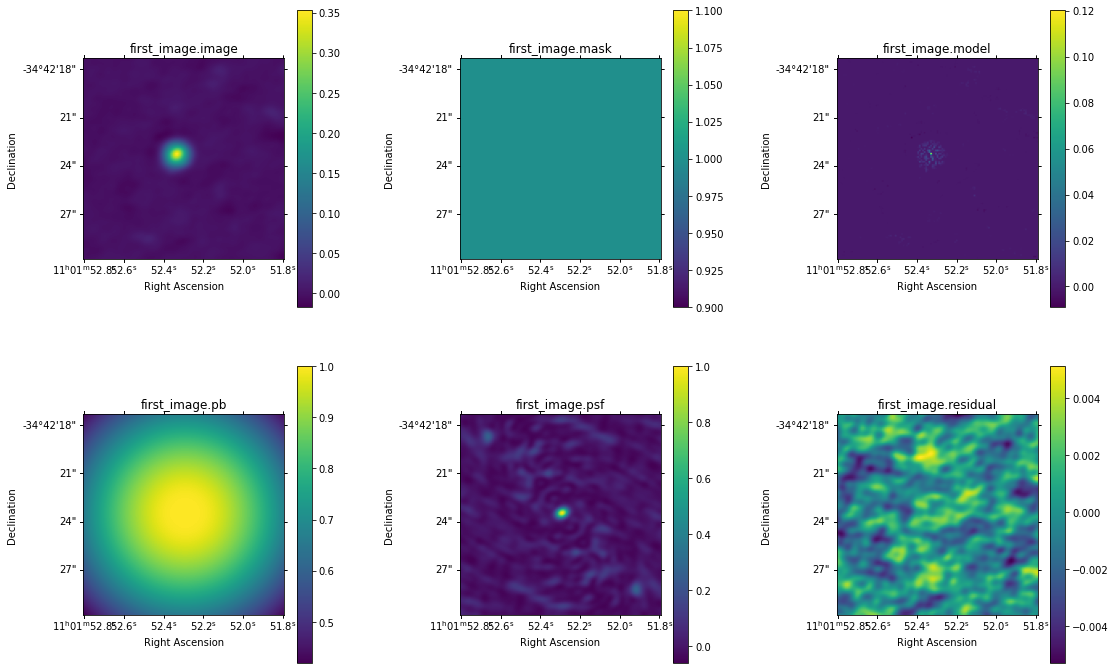

In [ ]:
from casatools import image as IA
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

filenames = ['first_image.image', 'first_image.mask', 'first_image.model', 
             'first_image.pb', 'first_image.psf', 'first_image.residual']

ia = IA()

def buildImage(imname='',chan=0):
    ia.open(imname)
    pix = ia.getchunk()[:,:,0,chan]
    csys = ia.coordsys()
    ia.close()
    
    rad_to_deg =  180/np.pi
    w = WCS(naxis=2)
    w.wcs.crpix = csys.referencepixel()['numeric'][0:2]
    w.wcs.cdelt = csys.increment()['numeric'][0:2]*rad_to_deg
    w.wcs.crval = csys.referencevalue()['numeric'][0:2]*rad_to_deg
    w.wcs.ctype = ['RA---SIN', 'DEC--SIN']
    
    return pix, w

plt.subplots(2,3, figsize=(18,12))
for ii, name in enumerate(filenames):
    pix, w = buildImage(name)
    ax = plt.subplot(2, 3, ii+1, projection=w)
    p1 = int(pix.shape[0]*0.25)
    p2 = int(pix.shape[0]*0.75)

    im = ax.imshow(pix[p1:p2,p1:p2].transpose(), origin='lower',  cmap=plt.cm.viridis)
    plt.colorbar(im, ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')

plt.subplots_adjust(wspace=0.5, hspace=0.2)

## View Images with CARTA
Consider this very experimental, even a bit magical

In [ ]:
import os
import subprocess as sp
import socket
import signal
import time
import requests

FRONT_PORT = '39138'  # make something up
BACK_PORT = '41578'
HOST_IP = socket.gethostbyname(socket.gethostname()) 

print("downloading ngrok...")
os.system("wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip")
os.system("unzip -o ngrok-stable-linux-amd64.zip");

print("downloading CARTA...")
os.system("wget https://github.com/CARTAvis/carta/releases/download/v1.4/CARTA-v1.4-RedHat7.tgz")
os.system("tar -xf CARTA-v1.4-RedHat7.tgz")
os.system("./CARTA.AppImage --appimage-extract")
os.system("rm squashfs-root/resources/app/carta-backend/lib/libstdc++.so.6")

#cp = sp.Popen('CARTA-v1.1-remote/carta --port='+BACK_PORT + ' --fport='+FRONT_PORT, shell=True, preexec_fn=os.setsid, stdin=sp.PIPE, stdout=sp.PIPE, stderr=sp.STDOUT)
cp = sp.Popen('./squashfs-root/AppRun --remote --port='+BACK_PORT + ' --fport='+FRONT_PORT, shell=True, preexec_fn=os.setsid, stdin=sp.PIPE, stdout=sp.PIPE, stderr=sp.STDOUT)
gp1 = sp.Popen('./ngrok http ' + HOST_IP+':'+FRONT_PORT, shell=True, preexec_fn=os.setsid, stdin=sp.PIPE, stdout=sp.PIPE, stderr=sp.STDOUT)
gp2 = sp.Popen('./ngrok http ' + HOST_IP+':'+BACK_PORT, shell=True, preexec_fn=os.setsid, stdin=sp.PIPE, stdout=sp.PIPE, stderr=sp.STDOUT)

time.sleep(2) # give the processes time to start
fcon = requests.get('http://localhost:4040/api/tunnels').json()['tunnels']
bcon = requests.get('http://localhost:4041/api/tunnels').json()['tunnels']
furl = [fcon[ii]['public_url'] for ii in range(len(fcon)) if fcon[ii]['proto'] == 'https'][0]
burl = [bcon[ii]['public_url'] for ii in range(len(bcon)) if bcon[ii]['proto'] == 'https'][0]
print('click this -> ' + furl +'/?socketUrl=' + burl.replace('https','wss'))

downloading ngrok...
downloading CARTA...
click this -> https://874e12bf1fed.ngrok.io/?socketUrl=wss://246ff04a903b.ngrok.io


In [ ]:
# turn it off
os.killpg(os.getpgid(gp1.pid), signal.SIGTERM)
os.killpg(os.getpgid(gp2.pid), signal.SIGTERM)
os.killpg(os.getpgid(cp.pid), signal.SIGTERM)
print("stopped CARTA and the secure tunnels")

stopped CARTA and the secure tunnels
